                                              __PROMOTION DATA PREDICTION__

__all the libraries are imported__

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('promotion_data1.csv')
df1

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,57489,Sales & Marketing,region_14,Bachelor's,m,other,1,25,4.0,3,0,0,47,0
1,10745,Operations,region_19,Master's & above,f,other,1,39,5.0,7,1,0,60,0
2,36031,Analytics,region_22,Bachelor's,f,other,1,30,3.0,2,1,0,84,0
3,19273,Finance,region_2,Bachelor's,m,other,2,39,5.0,8,0,0,60,0
4,41999,Procurement,region_22,Bachelor's,f,other,1,32,3.0,7,1,0,69,0
5,75230,Technology,region_8,Bachelor's,m,sourcing,2,29,4.0,6,0,0,78,0
6,1282,Technology,region_22,Master's & above,m,other,1,32,4.0,6,0,0,81,0
7,9660,Sales & Marketing,region_15,Bachelor's,f,sourcing,1,35,3.0,8,0,0,46,0
8,39864,Sales & Marketing,region_22,Bachelor's,f,other,1,29,3.0,4,0,0,51,0
9,77970,Operations,region_22,Master's & above,m,other,1,40,1.0,2,1,0,56,0


__the target variable is dropped here and stored in another variable Y__

__ANALYSING DATA__

In [3]:
df1.groupby('gender')['is_promoted'].count()

gender
f    11601
m    27244
Name: is_promoted, dtype: int64

__from the above group by code we can say that more males are promoted__

EMPLOYEE_ID


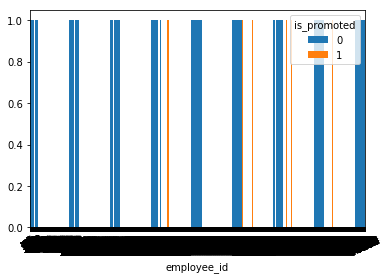



DEPARTMENT


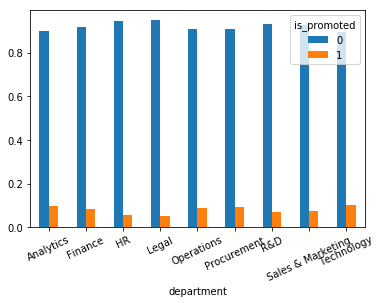



REGION


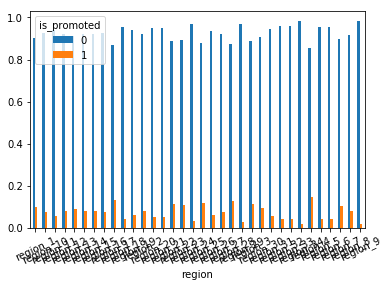



EDUCATION


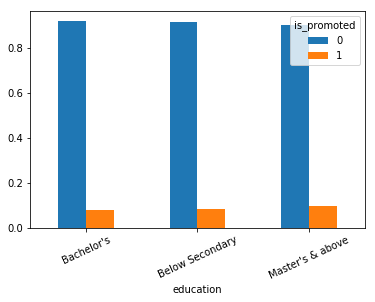



GENDER


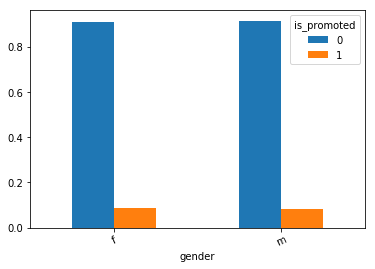



RECRUITMENT_CHANNEL


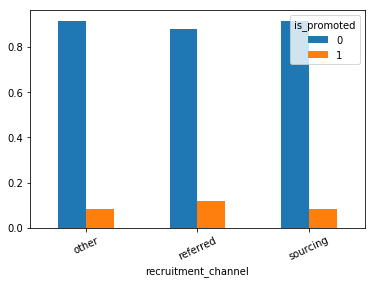



NO_OF_TRAININGS


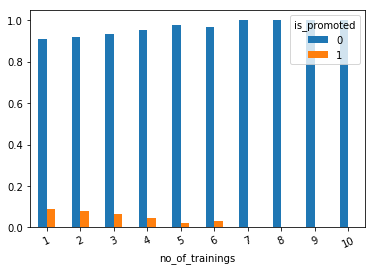



AGE


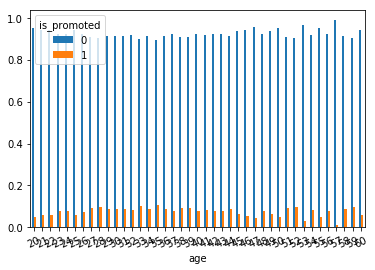



PREVIOUS_YEAR_RATING


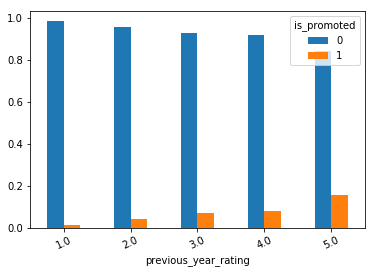



LENGTH_OF_SERVICE


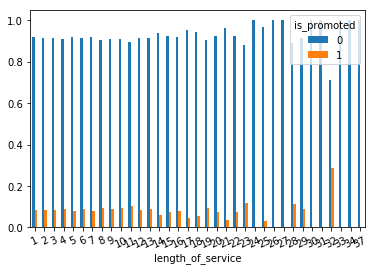



KPIS_MET >80%


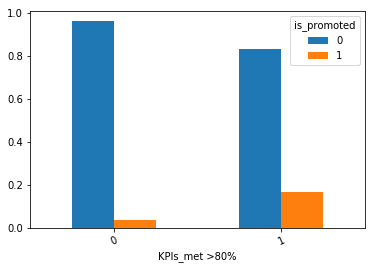



AWARDS_WON?


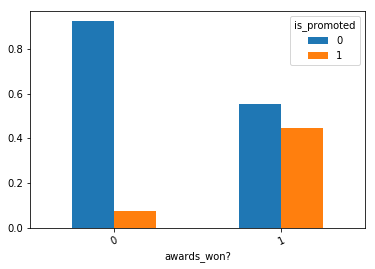



AVG_TRAINING_SCORE


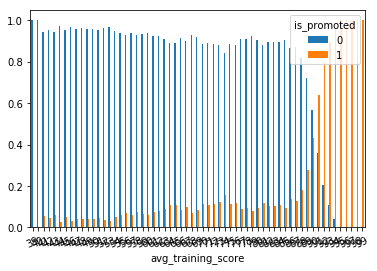

In [4]:
col=df1.columns[:-1]
for x in col:
    print(x.upper())
    pd.crosstab(df1[x], df1.is_promoted, normalize='index').plot(kind='bar')
    plt.xticks(rotation=25)
    plt.show()
    print('\n')

### Important features and Insights
['department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']

* 'avg_training_score' - Seems like an exponential relation
* 'awards_won?' - Strong preference for 1
* 'KPIs_met >80%' - Strong preferencefor 1
* 'previous_year_rating' - Appears to be a strong linear relationship
* 'no_of_trainings'- Weak inversely proportional relationship
* 'recruitment_channel'- Weak preference for reffered
* 'gender'- Weak preference for females
* 'education'- Weak preferece for Master's and above'
* 'region'- different values, but are they statistically significant
* 'department'- same as above

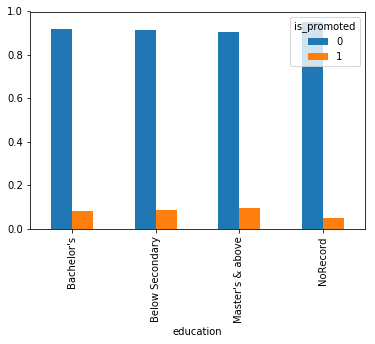

In [5]:
df1.education.fillna(value='NoRecord', inplace=True)
pd.crosstab(df1.education, df1.is_promoted, normalize='index').plot(kind='bar')
plt.show()

__It appears that promotion rate for NA values is below the promotion rate of other education levels. It could be that No records suggest a lower level of education than is suggested in the below secondary label__

In [3]:
X=df1.drop('is_promoted',axis=1)
Y=df1['is_promoted']
X.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,57489,Sales & Marketing,region_14,Bachelor's,m,other,1,25,4.0,3,0,0,47
1,10745,Operations,region_19,Master's & above,f,other,1,39,5.0,7,1,0,60
2,36031,Analytics,region_22,Bachelor's,f,other,1,30,3.0,2,1,0,84
3,19273,Finance,region_2,Bachelor's,m,other,2,39,5.0,8,0,0,60
4,41999,Procurement,region_22,Bachelor's,f,other,1,32,3.0,7,1,0,69


In [4]:
X

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,57489,Sales & Marketing,region_14,Bachelor's,m,other,1,25,4.0,3,0,0,47
1,10745,Operations,region_19,Master's & above,f,other,1,39,5.0,7,1,0,60
2,36031,Analytics,region_22,Bachelor's,f,other,1,30,3.0,2,1,0,84
3,19273,Finance,region_2,Bachelor's,m,other,2,39,5.0,8,0,0,60
4,41999,Procurement,region_22,Bachelor's,f,other,1,32,3.0,7,1,0,69
5,75230,Technology,region_8,Bachelor's,m,sourcing,2,29,4.0,6,0,0,78
6,1282,Technology,region_22,Master's & above,m,other,1,32,4.0,6,0,0,81
7,9660,Sales & Marketing,region_15,Bachelor's,f,sourcing,1,35,3.0,8,0,0,46
8,39864,Sales & Marketing,region_22,Bachelor's,f,other,1,29,3.0,4,0,0,51
9,77970,Operations,region_22,Master's & above,m,other,1,40,1.0,2,1,0,56


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38845 entries, 0 to 38844
Data columns (total 13 columns):
employee_id             38845 non-null int64
department              38845 non-null object
region                  38845 non-null object
education               37126 non-null object
gender                  38845 non-null object
recruitment_channel     38845 non-null object
no_of_trainings         38845 non-null int64
age                     38845 non-null int64
previous_year_rating    35961 non-null float64
length_of_service       38845 non-null int64
KPIs_met >80%           38845 non-null int64
awards_won?             38845 non-null int64
avg_training_score      38845 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 3.9+ MB


__gives the top 5 observations of the target variable__

In [6]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

__The future data set is imported__

In [7]:
df2=pd.read_csv('FutureData.csv')
df2.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,30153,Sales & Marketing,region_7,Bachelor's,f,other,1,39,3.0,6,0,0,47
1,23985,Procurement,region_2,Bachelor's,m,other,2,48,3.0,4,0,0,70
2,47486,Analytics,region_16,Bachelor's,m,sourcing,2,33,3.0,9,0,0,81
3,8213,Sales & Marketing,region_19,Bachelor's,m,other,1,36,4.0,5,0,0,42
4,55927,Operations,region_13,Master's & above,f,sourcing,1,41,4.0,6,1,0,62


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 13 columns):
employee_id             5001 non-null int64
department              5001 non-null object
region                  5001 non-null object
education               4809 non-null object
gender                  5001 non-null object
recruitment_channel     5001 non-null object
no_of_trainings         5001 non-null int64
age                     5001 non-null int64
previous_year_rating    4620 non-null float64
length_of_service       5001 non-null int64
KPIs_met >80%           5001 non-null int64
awards_won?             5001 non-null int64
avg_training_score      5001 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 508.0+ KB


__the two data frames- X and df2 are concatenated__

In [9]:
df=pd.concat([X,df2],axis=0,sort=False)
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,57489,Sales & Marketing,region_14,Bachelor's,m,other,1,25,4.0,3,0,0,47
1,10745,Operations,region_19,Master's & above,f,other,1,39,5.0,7,1,0,60
2,36031,Analytics,region_22,Bachelor's,f,other,1,30,3.0,2,1,0,84
3,19273,Finance,region_2,Bachelor's,m,other,2,39,5.0,8,0,0,60
4,41999,Procurement,region_22,Bachelor's,f,other,1,32,3.0,7,1,0,69


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43846 entries, 0 to 5000
Data columns (total 13 columns):
employee_id             43846 non-null int64
department              43846 non-null object
region                  43846 non-null object
education               41935 non-null object
gender                  43846 non-null object
recruitment_channel     43846 non-null object
no_of_trainings         43846 non-null int64
age                     43846 non-null int64
previous_year_rating    40581 non-null float64
length_of_service       43846 non-null int64
KPIs_met >80%           43846 non-null int64
awards_won?             43846 non-null int64
avg_training_score      43846 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 4.7+ MB


__this shows there are missing values in education,previous_year_rating,__

In [11]:
df=df.drop(['region','employee_id'],axis=1)
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,Bachelor's,m,other,1,25,4.0,3,0,0,47
1,Operations,Master's & above,f,other,1,39,5.0,7,1,0,60
2,Analytics,Bachelor's,f,other,1,30,3.0,2,1,0,84
3,Finance,Bachelor's,m,other,2,39,5.0,8,0,0,60
4,Procurement,Bachelor's,f,other,1,32,3.0,7,1,0,69


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43846 entries, 0 to 5000
Data columns (total 11 columns):
department              43846 non-null object
education               41935 non-null object
gender                  43846 non-null object
recruitment_channel     43846 non-null object
no_of_trainings         43846 non-null int64
age                     43846 non-null int64
previous_year_rating    40581 non-null float64
length_of_service       43846 non-null int64
KPIs_met >80%           43846 non-null int64
awards_won?             43846 non-null int64
avg_training_score      43846 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 4.0+ MB


__the variables like region & employee id are dropped from concatenated data frame as they are not useful in this
machine learning problem__

In [13]:
df.education.fillna(value='NoRecord', inplace=True)

In [14]:
df['education'].value_counts()

Bachelor's          29419
Master's & above    11868
NoRecord             1911
Below Secondary       648
Name: education, dtype: int64

In [15]:
df.gender=pd.Categorical(df.gender).codes
df.education=pd.Categorical(df.education).codes
df.department=pd.Categorical(df.department).codes
df.recruitment_channel=pd.Categorical(df.recruitment_channel).codes
df.education=pd.Categorical(df.education).codes
df.head()


,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,0,1,0,1,25,4.0,3,0,0,47
1,4,2,0,0,1,39,5.0,7,1,0,60
2,0,0,0,0,1,30,3.0,2,1,0,84
3,1,0,1,0,2,39,5.0,8,0,0,60
4,5,0,0,0,1,32,3.0,7,1,0,69


__The text columns are converted into numeric data to make the machine learning problem more meaningful__

In [16]:
df.isnull().any(axis=1).sum()

3265

__there are total 4124 no.of rows with missing values__

In [17]:
df.fillna(method ='pad')

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,0,1,0,1,25,4.0,3,0,0,47
1,4,2,0,0,1,39,5.0,7,1,0,60
2,0,0,0,0,1,30,3.0,2,1,0,84
3,1,0,1,0,2,39,5.0,8,0,0,60
4,5,0,0,0,1,32,3.0,7,1,0,69
5,8,0,1,2,2,29,4.0,6,0,0,78
6,8,2,1,0,1,32,4.0,6,0,0,81
7,7,0,0,2,1,35,3.0,8,0,0,46
8,7,0,0,0,1,29,3.0,4,0,0,51
9,4,2,1,0,1,40,1.0,2,1,0,56


__The missing values in all the features are replaced with their previous values__

In [18]:
df.previous_year_rating= df.previous_year_rating.fillna(method='pad')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43846 entries, 0 to 5000
Data columns (total 11 columns):
department              43846 non-null int8
education               43846 non-null int8
gender                  43846 non-null int8
recruitment_channel     43846 non-null int8
no_of_trainings         43846 non-null int64
age                     43846 non-null int64
previous_year_rating    43846 non-null float64
length_of_service       43846 non-null int64
KPIs_met >80%           43846 non-null int64
awards_won?             43846 non-null int64
avg_training_score      43846 non-null int64
dtypes: float64(1), int64(6), int8(4)
memory usage: 2.8 MB


In [19]:
df['Outstanding_score']= (df.avg_training_score>93)*1
df['Working_age']= np.logical_and((df.age>26), (df.age<40))*1
df['work_fraction'] = df['length_of_service'] / df['age']
df['start_age'] = df['age'] - df['length_of_service']

In [20]:
Q=df.iloc[0:38845,:]
Q

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Outstanding_score,Working_age,work_fraction,start_age
0,7,0,1,0,1,25,4.0,3,0,0,47,0,0,0.120000,22
1,4,2,0,0,1,39,5.0,7,1,0,60,0,1,0.179487,32
2,0,0,0,0,1,30,3.0,2,1,0,84,0,1,0.066667,28
3,1,0,1,0,2,39,5.0,8,0,0,60,0,1,0.205128,31
4,5,0,0,0,1,32,3.0,7,1,0,69,0,1,0.218750,25
5,8,0,1,2,2,29,4.0,6,0,0,78,0,1,0.206897,23
6,8,2,1,0,1,32,4.0,6,0,0,81,0,1,0.187500,26
7,7,0,0,2,1,35,3.0,8,0,0,46,0,1,0.228571,27
8,7,0,0,0,1,29,3.0,4,0,0,51,0,1,0.137931,25
9,4,2,1,0,1,40,1.0,2,1,0,56,0,0,0.050000,38


In [21]:
Z=df.iloc[38845:]
Z

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Outstanding_score,Working_age,work_fraction,start_age
0,7,0,0,0,1,39,3.0,6,0,0,47,0,1,0.153846,33
1,5,0,1,0,2,48,3.0,4,0,0,70,0,0,0.083333,44
2,0,0,1,2,2,33,3.0,9,0,0,81,0,1,0.272727,24
3,7,0,1,0,1,36,4.0,5,0,0,42,0,1,0.138889,31
4,4,2,0,2,1,41,4.0,6,1,0,62,0,0,0.146341,35
5,8,2,1,2,3,34,4.0,9,1,0,79,0,1,0.264706,25
6,8,0,0,2,1,33,4.0,4,0,0,78,0,1,0.121212,29
7,0,0,1,2,2,20,4.0,1,0,0,83,0,0,0.050000,19
8,0,0,1,0,2,28,4.0,2,0,0,81,0,1,0.071429,26
9,7,0,1,0,1,39,4.0,3,0,0,51,0,1,0.076923,36



__the combined data frame is again splitted using iloc function__

__logit model__

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [23]:
Q_train, Q_test, Y_train, Y_test = train_test_split(Q, Y, test_size=0.3, random_state=100)

In [24]:
logreg = LogisticRegression()

In [25]:
logreg.fit(Q_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
print('Train Score: ', logreg.score(Q_train, Y_train))
print('Test Score: ', logreg.score(Q_test, Y_test))

Train Score:  0.9197160825273069
Test Score:  0.922859104170242


__Tried with l1 penalty__

In [27]:
logreg2 = LogisticRegression(class_weight={0:0.65, 1:0.35}, C=2000, penalty='l1')
logreg2.fit(Q_train, Y_train)
print('Train Score: ', logreg2.score(Q_train, Y_train))
print('Test Score: ', logreg2.score(Q_test, Y_test))

Train Score:  0.920341289397227
Test Score:  0.9234597563068474


__trying a new model as the score under logit model is not so good__

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dt=DecisionTreeClassifier()
dt.fit(Q_train, Y_train)
print('Train: ',dt.score(Q_train, Y_train))
print('Test: ',dt.score(Q_test, Y_test))

Train:  0.9983082637637454
Test:  0.8941136090612665


__not a good score. There is overfitting so i tried random forest__

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf=RandomForestClassifier(random_state=21)
rf.fit(Q_train, Y_train)
print('Train Accuracy: ', rf.score(Q_train, Y_train))
print('Test Accuracy: ', rf.score(Q_test, Y_test))

Train Accuracy:  0.9871648707292854
Test Accuracy:  0.9237171786511069


__Tried different random states and replaced max_features=0.5 with 0.9__

In [33]:
rf=RandomForestClassifier(n_estimators=1500, max_depth=7, max_features=0.9, random_state= 100)
rf.fit(Q_train, Y_train)
print('Train Accuracy: ', rf.score(Q_train, Y_train))
print('Test Accuracy: ', rf.score(Q_test, Y_test))

Train Accuracy:  0.9308226986870656
Test Accuracy:  0.9328985755963618


__THIS SCORE IS STILL BETTER__

__The new file sys is imported to display the full array.__

In [37]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [34]:
apoorva_fut=rf.predict(Z)

In [35]:
fut_actual = pd.read_csv('future is_promoted.csv')
np.round(accuracy_score(apoorva_fut, fut_actual), 3)
 


0.927

__DECENT ACCURACY__